In [1]:
# Import the Earth Engine Python Package
import ee
from IPython.display import Image
import pprint
import ast
import pandas as pd

# Configure the pretty printing output.
pp = pprint.PrettyPrinter(depth=4)

# Initialize the Earth Engine object, using the authentication credentials.
ee.Initialize()

### Visualize all sample points on a map

In [2]:
import ipyleaflet 
wi_map = ipyleaflet.Map(center=(44, -88), zoom=8, layout={'height':'600px'})
dc = ipyleaflet.DrawControl()
wi_map.add_control(dc)
wi_map

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[44, -88], controls=(DrawControl(layer=FeatureGroup(), polygon={'shapeOptions': {}}, polyline={'shapeOptions': {}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']),), layout=Layout(height='600px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=8)

In [3]:
df = pd.read_pickle('./data/wi-lakes/wi_lakes_ls8_clean.pkl')

In [4]:
df.dtypes

start_date                  object
chlorophyll_ug_l           float64
wbic                        object
station_id                  object
record_date         datetime64[ns]
image_start_date    datetime64[ns]
image_end_date      datetime64[ns]
ls8_b1                     float64
ls8_b2                     float64
ls8_b3                     float64
ls8_b4                     float64
ls8_b5                     float64
depth_max_ft               float64
waterbody_type              object
area_acre                  float64
lake_name                   object
chlorophyll_tsi            float64
county                      object
coordinates                 object
trophic_status              object
dtype: object

In [5]:
# Pandas cannot work with lists. In order to get a unique list of coordinates, need to turn them into string
def turn_list_to_str(coordinates):
    return str(coordinates)

In [6]:
df['coordiantes_str'] = df.coordinates.apply(turn_list_to_str)

In [7]:
unique_coordinates = df.coordiantes_str.drop_duplicates()
coordinate_count = unique_coordinates.count()
unique_coordinates.index

Int64Index([   0,    3,   18,   28,   43,   56,   79,   90,  104,  118,
            ...
            8654, 8667, 8685, 8696, 8698, 8704, 8718, 8728, 8732, 8748],
           dtype='int64', length=676)

In [8]:
sample_coordinates = []

for i in unique_coordinates.index:
    sample_coordinates.append(df.coordinates[i])

sample_coordinates


[[-89.3813373, 44.4366549],
 [-89.4282752, 45.9097631],
 [-89.194145, 44.060486],
 [-91.4230985, 44.8149299],
 [-89.5927691, 45.7082067],
 [-91.3145902, 45.398658],
 [-90.0333383, 45.9323606],
 [-92.0610478, 46.4777493],
 [-89.343878, 46.1709627],
 [-88.4214329, 45.1140176],
 [-92.2598258, 45.5630678],
 [-89.6831654, 46.2159008],
 [-89.0638938, 45.9433929],
 [-92.364377, 45.3739234],
 [-88.8613424, 45.4013509],
 [-88.586644, 45.2829925],
 [-89.88152, 44.0306221],
 [-89.841425, 44.2096963],
 [-88.4718273, 43.1575715],
 [-91.4831226, 45.2778588],
 [-89.3457411, 46.0689717],
 [-88.222751, 44.9080997],
 [-91.5775881, 45.6450727],
 [-92.4272995, 45.4653956],
 [-88.620918, 45.2763428],
 [-91.599582, 45.2960866],
 [-92.2343582, 45.7897108],
 [-89.137703, 45.9242179],
 [-89.4896406, 45.4286207],
 [-92.2805272, 45.5653867],
 [-88.3494419, 45.2405226],
 [-88.0515639, 45.1319117],
 [-92.6489144, 45.0671136],
 [-91.9977817, 45.9150618],
 [-91.5839342, 45.9468226],
 [-88.5261306, 45.5123946],
 [-89

In [9]:
# Number of unique samp points
len(sample_coordinates)

676

In [10]:
# Create a feature collection of all sample points
sample_points = []

#for i in range(0,len(sample_coordinates)):
for i in range(len(sample_coordinates)):
    point = ee.Geometry.Point(sample_coordinates[i])
    sample_points.append(point)
    
all_sample_points = ee.FeatureCollection(sample_points)

print(all_sample_points)

ee.FeatureCollection({
  "type": "Invocation",
  "arguments": {
    "features": [
      {
        "type": "Invocation",
        "arguments": {
          "geometry": {
            "type": "Point",
            "coordinates": [
              -89.3813373,
              44.4366549
            ]
          }
        },
        "functionName": "Feature"
      },
      {
        "type": "Invocation",
        "arguments": {
          "geometry": {
            "type": "Point",
            "coordinates": [
              -89.4282752,
              45.9097631
            ]
          }
        },
        "functionName": "Feature"
      },
      {
        "type": "Invocation",
        "arguments": {
          "geometry": {
            "type": "Point",
            "coordinates": [
              -89.194145,
              44.060486
            ]
          }
        },
        "functionName": "Feature"
      },
      {
        "type": "Invocation",
        "arguments": {
          "geometry": {
          

In [11]:
# Generate a tile layer url
def GetTileLayerUrl(ee_image_object):
    map_id = ee.Image(ee_image_object).getMapId()
    tile_url_template = "https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}"
    return tile_url_template.format(**map_id)

# Generate a feature collection layer url
def GetFeatureLayerUrl(ee_featurecollection_object):
    map_id = ee.FeatureCollection(ee_featurecollection_object).getMapId()
    featurecollection_url_template = "https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}"
    return featurecollection_url_template.format(**map_id)

In [12]:
url = GetFeatureLayerUrl(all_sample_points)

print(url)

wi_map.add_layer(ipyleaflet.TileLayer(url=url))

https://earthengine.googleapis.com/map/6bd3678110d7d638909dd344dcdbc999/{z}/{x}/{y}?token=afcb007420ff9a0eafe26fd031f94ad4


### Explore other data

In [15]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [16]:
df

,start_date,chlorophyll_ug_l,wbic,station_id,record_date,image_start_date,image_end_date,ls8_b1,ls8_b2,ls8_b3,...,ls8_b5,depth_max_ft,waterbody_type,area_acre,lake_name,chlorophyll_tsi,county,coordinates,trophic_status,coordiantes_str
0,07/17/2017,3.38,267800,504001,2017-07-17,2017-07-10,2017-07-24,2158.0,2120.0,2165.0,...,3503.0,44.0,lake,30.0,Adams Lake,44.0,Portage,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]"
1,08/08/2017,2.99,267800,504001,2017-08-08,2017-08-01,2017-08-15,1024.0,1033.0,1125.0,...,2816.0,44.0,lake,30.0,Adams Lake,43.0,Portage,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]"
2,09/13/2017,5.88,267800,504001,2017-09-13,2017-09-06,2017-09-20,2251.0,2240.0,2275.0,...,3448.0,44.0,lake,30.0,Adams Lake,48.0,Portage,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]"
3,06/27/2013,1.72,967900,643047,2013-06-27,2013-06-20,2013-07-04,223.0,297.0,421.0,...,512.0,18.0,lake,58.0,Alma Lake,39.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
4,07/24/2013,5.11,967900,643047,2013-07-24,2013-07-17,2013-07-31,5779.0,5948.0,6192.0,...,7382.0,18.0,lake,58.0,Alma Lake,47.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
5,08/28/2013,4.43,967900,643047,2013-08-28,2013-08-21,2013-09-04,2709.0,2662.0,2772.0,...,4055.0,18.0,lake,58.0,Alma Lake,46.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
6,06/23/2014,2.11,967900,643047,2014-06-23,2014-06-16,2014-06-30,378.0,349.0,332.0,...,165.0,18.0,lake,58.0,Alma Lake,40.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
7,07/28/2014,2.77,967900,643047,2014-07-28,2014-07-21,2014-08-04,696.0,701.0,714.0,...,704.0,18.0,lake,58.0,Alma Lake,43.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
8,08/26/2014,4.82,967900,643047,2014-08-26,2014-08-19,2014-09-02,5090.0,5119.0,5260.0,...,6152.0,18.0,lake,58.0,Alma Lake,47.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
9,06/18/2015,2.43,967900,643047,2015-06-18,2015-06-11,2015-06-25,7897.0,7944.0,7883.0,...,8081.0,18.0,lake,58.0,Alma Lake,42.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"


In [17]:
df.describe()

,chlorophyll_ug_l,ls8_b1,ls8_b2,ls8_b3,ls8_b4,ls8_b5,depth_max_ft,area_acre,chlorophyll_tsi
count,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000
mean,11.848077,1988.998014,2009.667991,2074.423481,2008.368692,2462.664252,40.575643,1960.985981,48.392640
std,17.105086,2537.424751,2558.930138,2562.679210,2643.319631,2820.014617,28.789148,11117.041703,8.421617
min,0.160000,3.000000,35.000000,61.000000,5.000000,1.000000,4.000000,6.000000,21.000000
25%,2.747500,209.000000,231.000000,297.000000,184.000000,236.000000,21.000000,120.000000,42.000000
50%,5.030000,472.500000,485.000000,613.000000,458.500000,888.500000,34.000000,295.000000,47.000000
75%,12.200000,3201.500000,3197.750000,3298.000000,3256.000000,4445.000000,52.000000,936.250000,54.000000
max,112.000000,12028.000000,12267.000000,12689.000000,13016.000000,12931.000000,236.000000,131939.000000,70.000000


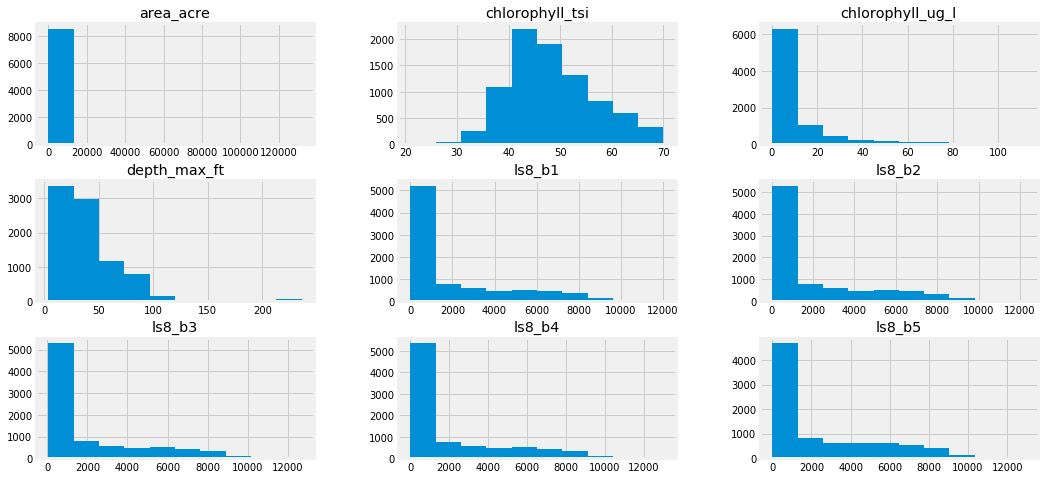

In [18]:
df[['chlorophyll_ug_l','chlorophyll_tsi','ls8_b1', 'ls8_b2', 'ls8_b3', 'ls8_b4', 'ls8_b5','depth_max_ft','area_acre']].hist(figsize=(16,8));

In [19]:
df = df[(df.depth_max_ft < df.depth_max_ft.quantile(0.99)) & (df.area_acre < df.area_acre.quantile(0.99))]

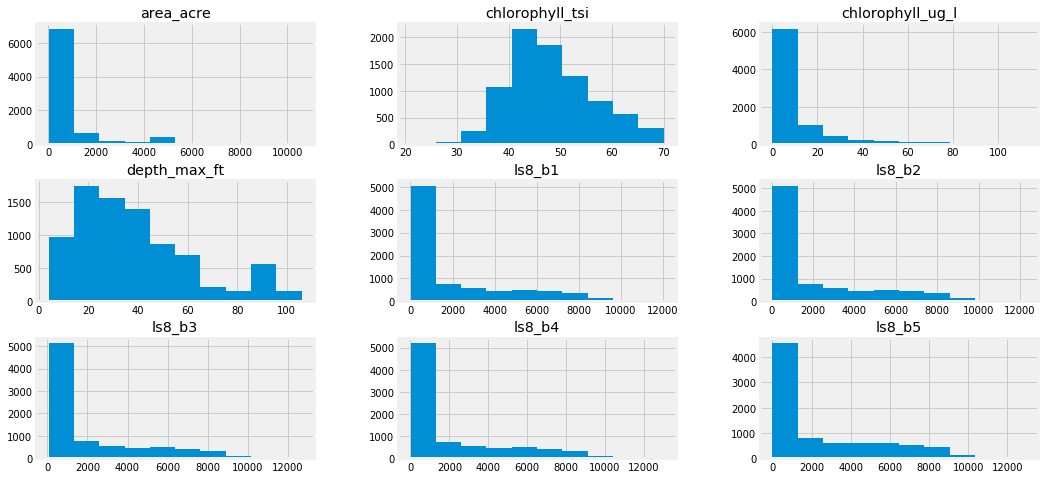

In [20]:
df[['chlorophyll_ug_l','chlorophyll_tsi','ls8_b1', 'ls8_b2', 'ls8_b3', 'ls8_b4', 'ls8_b5','depth_max_ft','area_acre']].hist(figsize=(16,8));

In [21]:
df

,start_date,chlorophyll_ug_l,wbic,station_id,record_date,image_start_date,image_end_date,ls8_b1,ls8_b2,ls8_b3,...,ls8_b5,depth_max_ft,waterbody_type,area_acre,lake_name,chlorophyll_tsi,county,coordinates,trophic_status,coordiantes_str
0,07/17/2017,3.38,267800,504001,2017-07-17,2017-07-10,2017-07-24,2158.0,2120.0,2165.0,...,3503.0,44.0,lake,30.0,Adams Lake,44.0,Portage,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]"
1,08/08/2017,2.99,267800,504001,2017-08-08,2017-08-01,2017-08-15,1024.0,1033.0,1125.0,...,2816.0,44.0,lake,30.0,Adams Lake,43.0,Portage,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]"
2,09/13/2017,5.88,267800,504001,2017-09-13,2017-09-06,2017-09-20,2251.0,2240.0,2275.0,...,3448.0,44.0,lake,30.0,Adams Lake,48.0,Portage,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]"
3,06/27/2013,1.72,967900,643047,2013-06-27,2013-06-20,2013-07-04,223.0,297.0,421.0,...,512.0,18.0,lake,58.0,Alma Lake,39.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
4,07/24/2013,5.11,967900,643047,2013-07-24,2013-07-17,2013-07-31,5779.0,5948.0,6192.0,...,7382.0,18.0,lake,58.0,Alma Lake,47.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
5,08/28/2013,4.43,967900,643047,2013-08-28,2013-08-21,2013-09-04,2709.0,2662.0,2772.0,...,4055.0,18.0,lake,58.0,Alma Lake,46.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
6,06/23/2014,2.11,967900,643047,2014-06-23,2014-06-16,2014-06-30,378.0,349.0,332.0,...,165.0,18.0,lake,58.0,Alma Lake,40.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
7,07/28/2014,2.77,967900,643047,2014-07-28,2014-07-21,2014-08-04,696.0,701.0,714.0,...,704.0,18.0,lake,58.0,Alma Lake,43.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
8,08/26/2014,4.82,967900,643047,2014-08-26,2014-08-19,2014-09-02,5090.0,5119.0,5260.0,...,6152.0,18.0,lake,58.0,Alma Lake,47.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"
9,06/18/2015,2.43,967900,643047,2015-06-18,2015-06-11,2015-06-25,7897.0,7944.0,7883.0,...,8081.0,18.0,lake,58.0,Alma Lake,42.0,Vilas,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]"


In [22]:
df['ln_chla'] = np.log(df.chlorophyll_ug_l)
df['ln_area'] = np.log(df.area_acre)
df['ln_b1'] = np.log(df.ls8_b1)
df['ln_b2'] = np.log(df.ls8_b2)
df['ln_b3'] = np.log(df.ls8_b3)
df['ln_b4'] = np.log(df.ls8_b4)
df['ln_b5'] = np.log(df.ls8_b5)
df

C:\Users\Yiyuan.Qin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yiyuan.Qin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Yiyuan.Qin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,start_date,chlorophyll_ug_l,wbic,station_id,record_date,image_start_date,image_end_date,ls8_b1,ls8_b2,ls8_b3,...,coordinates,trophic_status,coordiantes_str,ln_chla,ln_area,ln_b1,ln_b2,ln_b3,ln_b4,ln_b5
0,07/17/2017,3.38,267800,504001,2017-07-17,2017-07-10,2017-07-24,2158.0,2120.0,2165.0,...,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]",1.217876,3.401197,7.676937,7.659171,7.680176,7.604894,8.161375
1,08/08/2017,2.99,267800,504001,2017-08-08,2017-08-01,2017-08-15,1024.0,1033.0,1125.0,...,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]",1.095273,3.401197,6.931472,6.940222,7.025538,6.904751,7.943073
2,09/13/2017,5.88,267800,504001,2017-09-13,2017-09-06,2017-09-20,2251.0,2240.0,2275.0,...,"[-89.3813373, 44.4366549]",mesotrophic,"[-89.3813373, 44.4366549]",1.771557,3.401197,7.719130,7.714231,7.729735,7.702104,8.145550
3,06/27/2013,1.72,967900,643047,2013-06-27,2013-06-20,2013-07-04,223.0,297.0,421.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",0.542324,4.060443,5.407172,5.693732,6.042633,5.662960,6.238325
4,07/24/2013,5.11,967900,643047,2013-07-24,2013-07-17,2013-07-31,5779.0,5948.0,6192.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",1.631199,4.060443,8.661986,8.690810,8.731013,8.760610,8.906800
5,08/28/2013,4.43,967900,643047,2013-08-28,2013-08-21,2013-09-04,2709.0,2662.0,2772.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",1.488400,4.060443,7.904335,7.886833,7.927324,7.900266,8.307706
6,06/23/2014,2.11,967900,643047,2014-06-23,2014-06-16,2014-06-30,378.0,349.0,332.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",0.746688,4.060443,5.934894,5.855072,5.805135,5.209486,5.105945
7,07/28/2014,2.77,967900,643047,2014-07-28,2014-07-21,2014-08-04,696.0,701.0,714.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",1.018847,4.060443,6.545350,6.552508,6.570883,6.200509,6.556778
8,08/26/2014,4.82,967900,643047,2014-08-26,2014-08-19,2014-09-02,5090.0,5119.0,5260.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",1.572774,4.060443,8.535033,8.540714,8.567886,8.575651,8.724533
9,06/18/2015,2.43,967900,643047,2015-06-18,2015-06-11,2015-06-25,7897.0,7944.0,7883.0,...,"[-89.4282752, 45.9097631]",mesotrophic,"[-89.4282752, 45.9097631]",0.887891,4.060443,8.974238,8.980172,8.972464,8.980298,8.997271


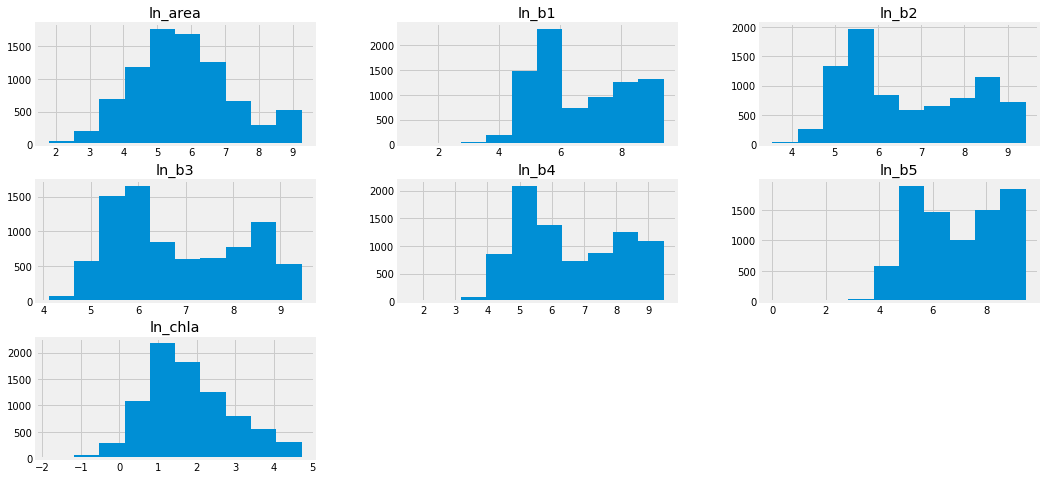

In [23]:
df[['ln_chla','ln_b1', 'ln_b2', 'ln_b3', 'ln_b4', 'ln_b5', 'ln_area']].hist(figsize=(16,8));

In [24]:
df.describe()

,chlorophyll_ug_l,ls8_b1,ls8_b2,ls8_b3,ls8_b4,ls8_b5,depth_max_ft,area_acre,chlorophyll_tsi,ln_chla,ln_area,ln_b1,ln_b2,ln_b3,ln_b4,ln_b5
count,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000
mean,11.655713,2004.208428,2024.853164,2089.465962,2024.169168,2482.191980,38.961880,858.160644,48.306639,1.785984,5.747060,6.604298,6.668881,6.810019,6.542145,6.868423
std,16.858061,2548.486544,2570.400047,2575.110424,2656.047461,2833.400189,23.738328,1472.813748,8.381018,1.108630,1.422704,1.520901,1.439439,1.333370,1.568111,1.550038
min,0.160000,3.000000,35.000000,61.000000,5.000000,1.000000,4.000000,6.000000,21.000000,-1.832581,1.791759,1.098612,3.555348,4.110874,1.609438,0.000000
25%,2.730000,210.000000,231.000000,294.000000,182.000000,236.000000,21.000000,116.000000,42.000000,1.004302,4.753590,5.347108,5.442418,5.683580,5.204007,5.463832
50%,4.970000,473.000000,485.000000,612.000000,457.000000,886.000000,34.000000,283.000000,47.000000,1.603420,5.645447,6.159095,6.184149,6.416732,6.124683,6.786717
75%,12.100000,3240.000000,3253.000000,3309.000000,3314.000000,4485.000000,52.000000,859.000000,54.000000,2.493205,6.755769,8.083329,8.087333,8.104401,8.105911,8.408494
max,112.000000,12028.000000,12267.000000,12689.000000,13016.000000,12931.000000,106.000000,10595.000000,70.000000,4.718499,9.268137,9.394993,9.414668,9.448491,9.473935,9.467383


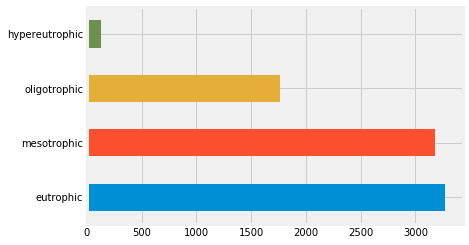

In [25]:
df.trophic_status.value_counts().plot(kind='barh');

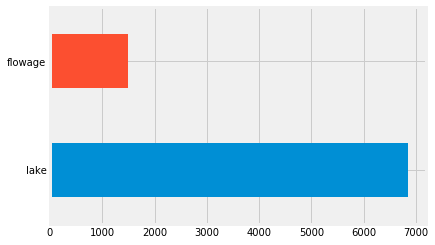

In [26]:
df.waterbody_type.value_counts().plot(kind='barh');

In [27]:
trophic_dummies = pd.get_dummies(df.trophic_status)
df = df.join(trophic_dummies)

In [28]:
df['trophic_num'] = df['trophic_status']

In [29]:
df.replace({ 'trophic_num' : 
                {'oligotrophic' : 1, 
                 'mesotrophic': 2, 
                 'eutrophic': 3, 
                 'hypereutrophic': 4, 
                 }
               },
                 inplace = True
              )

In [30]:
df

,start_date,chlorophyll_ug_l,wbic,station_id,record_date,image_start_date,image_end_date,ls8_b1,ls8_b2,ls8_b3,...,ln_b1,ln_b2,ln_b3,ln_b4,ln_b5,eutrophic,hypereutrophic,mesotrophic,oligotrophic,trophic_num
0,07/17/2017,3.38,267800,504001,2017-07-17,2017-07-10,2017-07-24,2158.0,2120.0,2165.0,...,7.676937,7.659171,7.680176,7.604894,8.161375,0,0,1,0,2
1,08/08/2017,2.99,267800,504001,2017-08-08,2017-08-01,2017-08-15,1024.0,1033.0,1125.0,...,6.931472,6.940222,7.025538,6.904751,7.943073,0,0,1,0,2
2,09/13/2017,5.88,267800,504001,2017-09-13,2017-09-06,2017-09-20,2251.0,2240.0,2275.0,...,7.719130,7.714231,7.729735,7.702104,8.145550,0,0,1,0,2
3,06/27/2013,1.72,967900,643047,2013-06-27,2013-06-20,2013-07-04,223.0,297.0,421.0,...,5.407172,5.693732,6.042633,5.662960,6.238325,0,0,1,0,2
4,07/24/2013,5.11,967900,643047,2013-07-24,2013-07-17,2013-07-31,5779.0,5948.0,6192.0,...,8.661986,8.690810,8.731013,8.760610,8.906800,0,0,1,0,2
5,08/28/2013,4.43,967900,643047,2013-08-28,2013-08-21,2013-09-04,2709.0,2662.0,2772.0,...,7.904335,7.886833,7.927324,7.900266,8.307706,0,0,1,0,2
6,06/23/2014,2.11,967900,643047,2014-06-23,2014-06-16,2014-06-30,378.0,349.0,332.0,...,5.934894,5.855072,5.805135,5.209486,5.105945,0,0,1,0,2
7,07/28/2014,2.77,967900,643047,2014-07-28,2014-07-21,2014-08-04,696.0,701.0,714.0,...,6.545350,6.552508,6.570883,6.200509,6.556778,0,0,1,0,2
8,08/26/2014,4.82,967900,643047,2014-08-26,2014-08-19,2014-09-02,5090.0,5119.0,5260.0,...,8.535033,8.540714,8.567886,8.575651,8.724533,0,0,1,0,2
9,06/18/2015,2.43,967900,643047,2015-06-18,2015-06-11,2015-06-25,7897.0,7944.0,7883.0,...,8.974238,8.980172,8.972464,8.980298,8.997271,0,0,1,0,2


In [31]:
df_model_1 = df[['ln_chla','chlorophyll_tsi','ln_b1', 'ln_b2', 'ln_b3', 'ln_b4', 'ln_b5','ln_area','depth_max_ft','eutrophic','hypereutrophic','mesotrophic','oligotrophic']]

In [32]:
df_model_2 = df[['ln_chla','ln_b1', 'ln_b2', 'ln_b3', 'ln_b4', 'ln_b5','ln_area','depth_max_ft','trophic_num']]

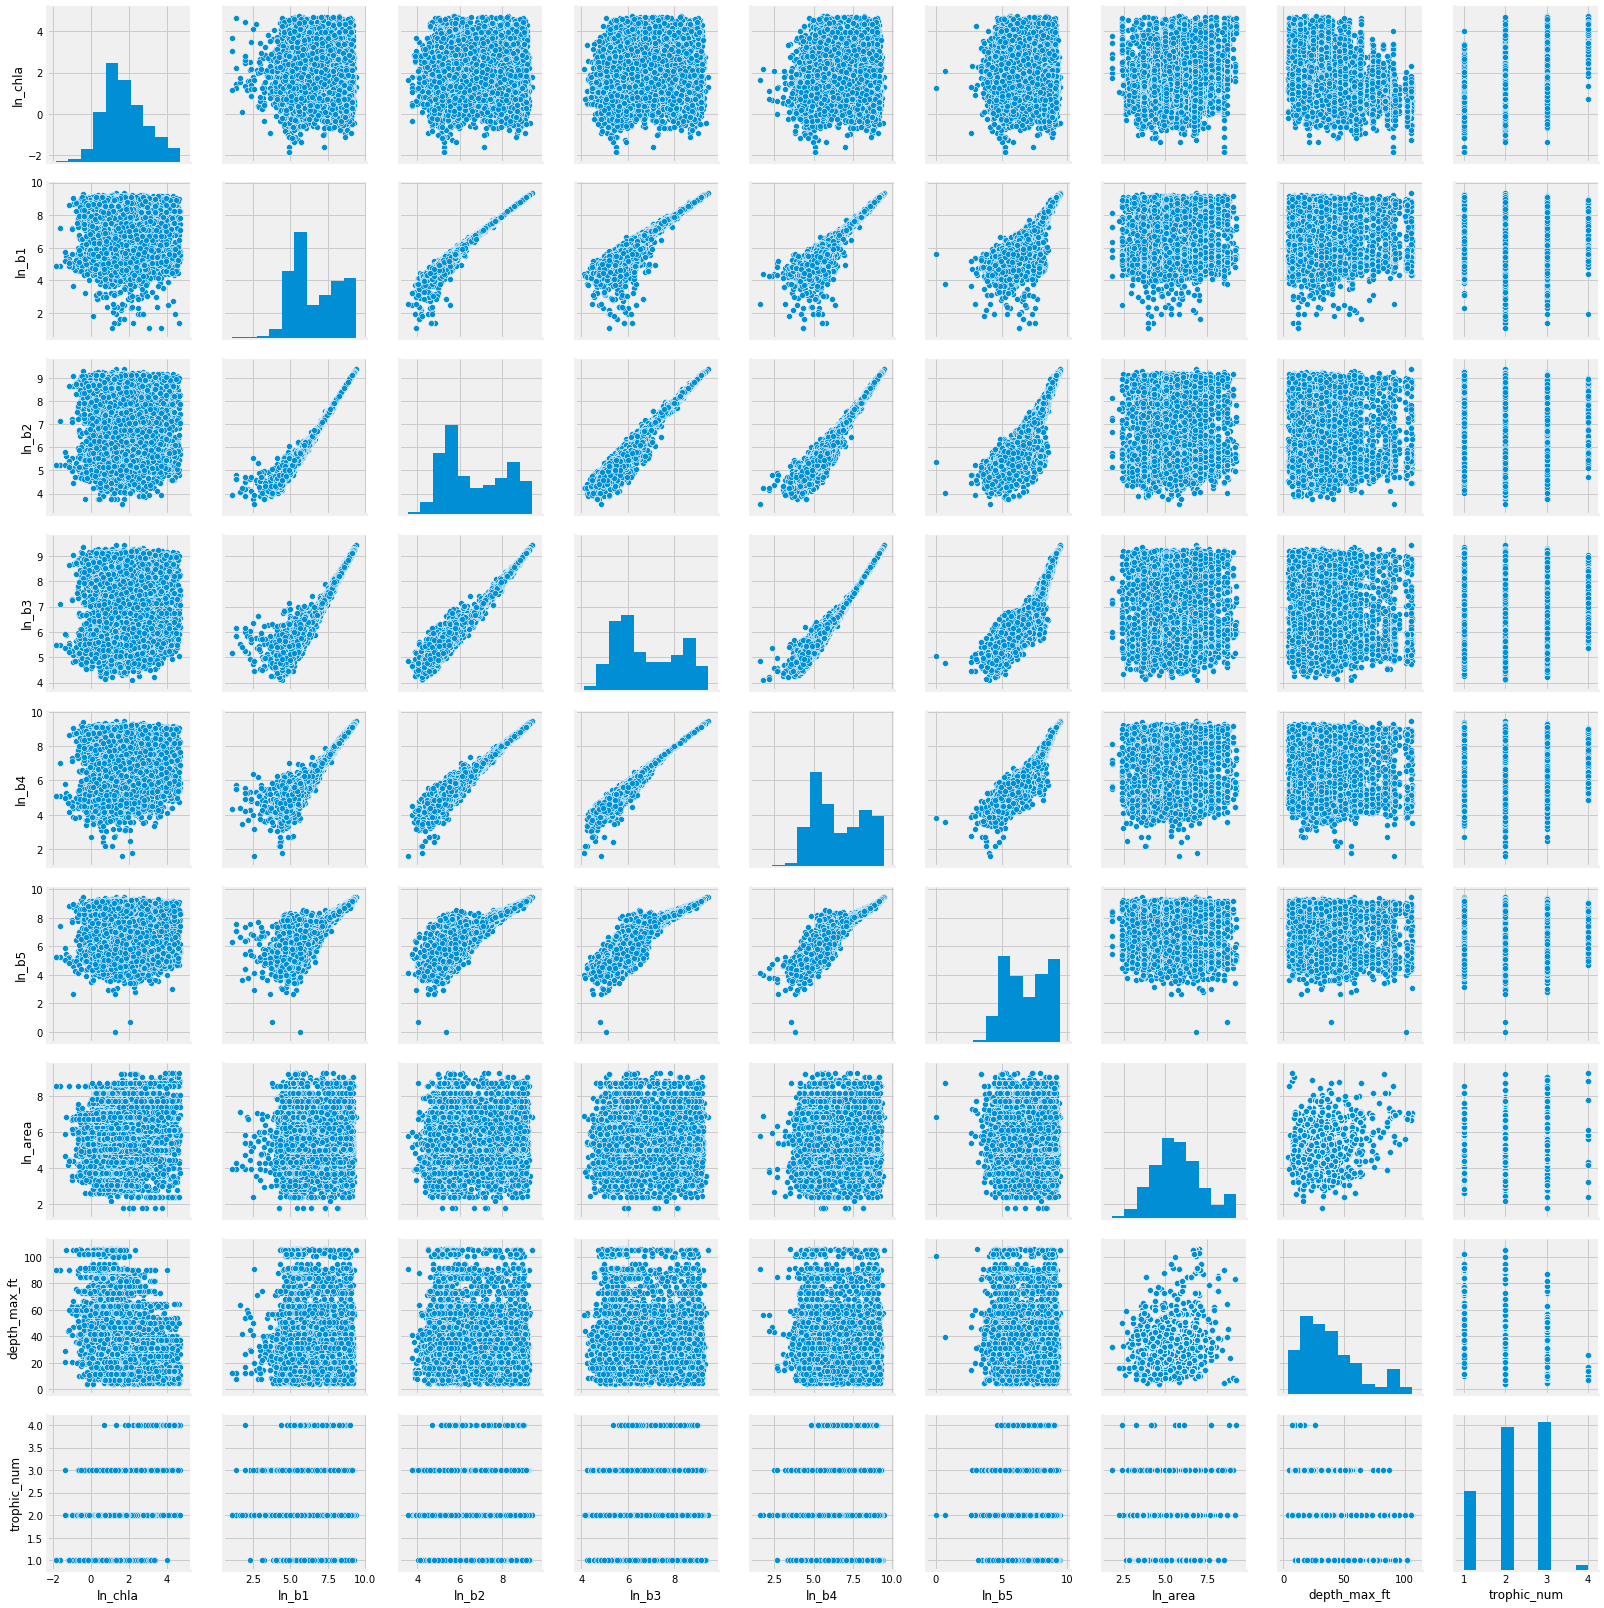

In [33]:
sns.pairplot(df_model_2);

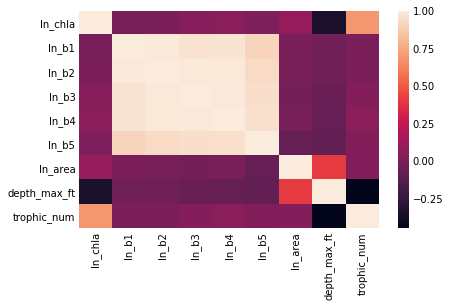

In [34]:
corr = df_model_2.corr();
sns.heatmap(corr);

In [35]:
df.describe()

,chlorophyll_ug_l,ls8_b1,ls8_b2,ls8_b3,ls8_b4,ls8_b5,depth_max_ft,area_acre,chlorophyll_tsi,ln_chla,...,ln_b1,ln_b2,ln_b3,ln_b4,ln_b5,eutrophic,hypereutrophic,mesotrophic,oligotrophic,trophic_num
count,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,...,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000,8329.000000
mean,11.655713,2004.208428,2024.853164,2089.465962,2024.169168,2482.191980,38.961880,858.160644,48.306639,1.785984,...,6.604298,6.668881,6.810019,6.542145,6.868423,0.392484,0.014888,0.381198,0.211430,2.210830
std,16.858061,2548.486544,2570.400047,2575.110424,2656.047461,2833.400189,23.738328,1472.813748,8.381018,1.108630,...,1.520901,1.439439,1.333370,1.568111,1.550038,0.488333,0.121111,0.485710,0.408347,0.786823
min,0.160000,3.000000,35.000000,61.000000,5.000000,1.000000,4.000000,6.000000,21.000000,-1.832581,...,1.098612,3.555348,4.110874,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.730000,210.000000,231.000000,294.000000,182.000000,236.000000,21.000000,116.000000,42.000000,1.004302,...,5.347108,5.442418,5.683580,5.204007,5.463832,0.000000,0.000000,0.000000,0.000000,2.000000
50%,4.970000,473.000000,485.000000,612.000000,457.000000,886.000000,34.000000,283.000000,47.000000,1.603420,...,6.159095,6.184149,6.416732,6.124683,6.786717,0.000000,0.000000,0.000000,0.000000,2.000000
75%,12.100000,3240.000000,3253.000000,3309.000000,3314.000000,4485.000000,52.000000,859.000000,54.000000,2.493205,...,8.083329,8.087333,8.104401,8.105911,8.408494,1.000000,0.000000,1.000000,0.000000,3.000000
max,112.000000,12028.000000,12267.000000,12689.000000,13016.000000,12931.000000,106.000000,10595.000000,70.000000,4.718499,...,9.394993,9.414668,9.448491,9.473935,9.467383,1.000000,1.000000,1.000000,1.000000,4.000000


In [36]:
df_lake = df[df.waterbody_type == 'lake']
df_lake

,start_date,chlorophyll_ug_l,wbic,station_id,record_date,image_start_date,image_end_date,ls8_b1,ls8_b2,ls8_b3,...,ln_b1,ln_b2,ln_b3,ln_b4,ln_b5,eutrophic,hypereutrophic,mesotrophic,oligotrophic,trophic_num
0,07/17/2017,3.380,267800,504001,2017-07-17,2017-07-10,2017-07-24,2158.0,2120.0,2165.0,...,7.676937,7.659171,7.680176,7.604894,8.161375,0,0,1,0,2
1,08/08/2017,2.990,267800,504001,2017-08-08,2017-08-01,2017-08-15,1024.0,1033.0,1125.0,...,6.931472,6.940222,7.025538,6.904751,7.943073,0,0,1,0,2
2,09/13/2017,5.880,267800,504001,2017-09-13,2017-09-06,2017-09-20,2251.0,2240.0,2275.0,...,7.719130,7.714231,7.729735,7.702104,8.145550,0,0,1,0,2
3,06/27/2013,1.720,967900,643047,2013-06-27,2013-06-20,2013-07-04,223.0,297.0,421.0,...,5.407172,5.693732,6.042633,5.662960,6.238325,0,0,1,0,2
4,07/24/2013,5.110,967900,643047,2013-07-24,2013-07-17,2013-07-31,5779.0,5948.0,6192.0,...,8.661986,8.690810,8.731013,8.760610,8.906800,0,0,1,0,2
5,08/28/2013,4.430,967900,643047,2013-08-28,2013-08-21,2013-09-04,2709.0,2662.0,2772.0,...,7.904335,7.886833,7.927324,7.900266,8.307706,0,0,1,0,2
6,06/23/2014,2.110,967900,643047,2014-06-23,2014-06-16,2014-06-30,378.0,349.0,332.0,...,5.934894,5.855072,5.805135,5.209486,5.105945,0,0,1,0,2
7,07/28/2014,2.770,967900,643047,2014-07-28,2014-07-21,2014-08-04,696.0,701.0,714.0,...,6.545350,6.552508,6.570883,6.200509,6.556778,0,0,1,0,2
8,08/26/2014,4.820,967900,643047,2014-08-26,2014-08-19,2014-09-02,5090.0,5119.0,5260.0,...,8.535033,8.540714,8.567886,8.575651,8.724533,0,0,1,0,2
9,06/18/2015,2.430,967900,643047,2015-06-18,2015-06-11,2015-06-25,7897.0,7944.0,7883.0,...,8.974238,8.980172,8.972464,8.980298,8.997271,0,0,1,0,2


C:\Users\Yiyuan.Qin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


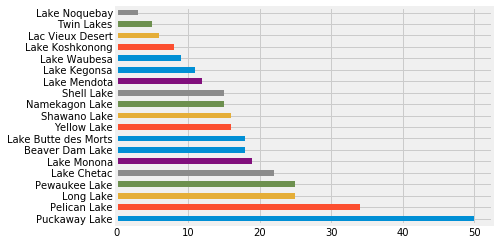

In [37]:
select = ((df.trophic_num >1) & (df.area_acre>2000))
df_lake[select].lake_name.value_counts().plot(kind='barh');

In [38]:
df_lake[df_lake.lake_name == 'Puckaway Lake'].trophic_num

4132    3
4133    3
4134    3
4135    3
4136    3
4137    3
4138    3
4139    3
4140    3
4141    3
4142    3
4143    3
4144    3
4145    3
4146    3
4147    3
4148    3
4149    3
4150    3
4151    3
4152    3
4153    3
4154    3
4155    3
6804    3
6805    3
6806    3
6807    3
6808    3
6809    3
6810    3
6811    3
6812    3
6813    3
6814    3
6815    3
6816    3
6817    3
6818    3
6819    3
6820    3
6821    3
6822    3
6823    3
6824    3
6825    3
6826    3
6827    3
6828    3
6829    3
Name: trophic_num, dtype: int64

## Linear regression 1

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
feature_cols = ['ln_b1', 'ln_b2', 'ln_b3', 'ln_b4', 'ln_b5','ln_area', 'depth_max_ft','trophic_num']
X = df_lake[feature_cols]
y = df_lake.chlorophyll_tsi

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [54]:
# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(6843, 8)
(5132, 8)
(1711, 8)


In [55]:
# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(6843,)
(5132,)
(1711,)


In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

30.31304260276726
31.373686926799984


In [58]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5.60122191372561

In [59]:
y_train.mean()

47.602104442712395

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test, y_pred)  

0.5162035003393192

In [62]:
print(lr.intercept_)
print('ln_b1', 'ln_b2', 'ln_b3', 'ln_b4', 'ln_b5','ln_area','depth_max_ft','trophic_num')
print(lr.coef_)


31.312926773683877
ln_b1 ln_b2 ln_b3 ln_b4 ln_b5 ln_area depth_max_ft trophic_num
[  2.95740865 -11.25182775   6.76894873   2.83645281  -1.14567784
   0.52015693  -0.03468449   6.35594522]
